In [16]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [33]:
#Read the Whale Portfolio daily returns and clean the data

In [20]:
# Reading whale returns
whale_csv_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_csv_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [21]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [22]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [23]:
# Reading algorithmic returns
algo_csv_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_csv_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [24]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [25]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [ ]:
## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [26]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_csv_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
sp500_history.head()

Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [27]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [28]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [ ]:
sp500_history.head()

In [29]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history.pct_change()
daily_returns_sp500.head()

Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279

In [30]:
# Drop nulls
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.head()

Close
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509

In [31]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500.rename(columns = {"Close":"S&P 500"}, inplace = True)
daily_returns_sp500.head()

S&P 500
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509

In [ ]:
## Combine Whale, Algorithmic, and S&P 500 Returns

In [32]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, daily_returns_sp500], axis="columns", join="inner")

combined_returns.sort_index(inplace=True)

combined_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254

In [ ]:
# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

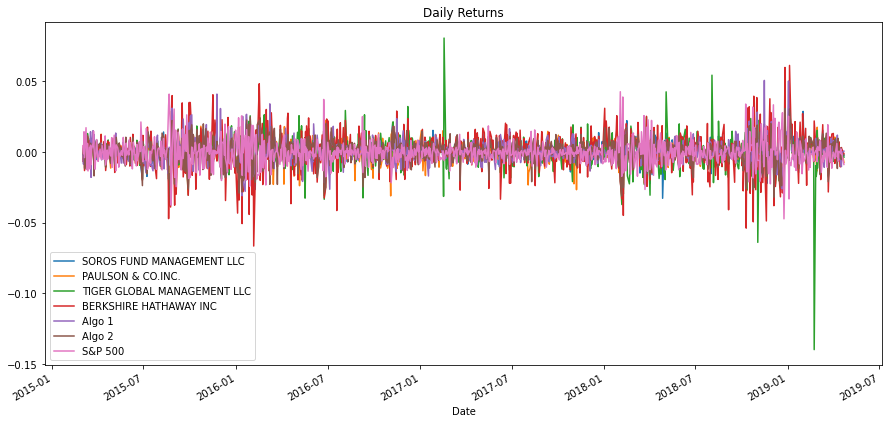

In [34]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(15,7), title ="Daily Returns")

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

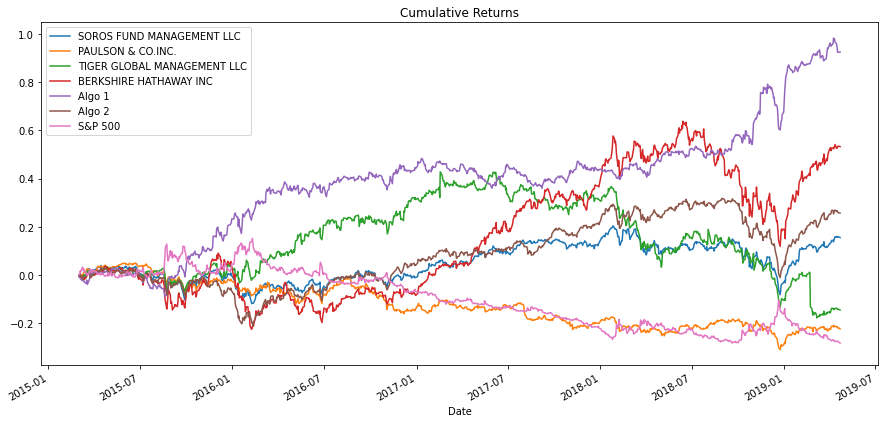

In [35]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,7), title ="Cumulative Returns")

In [ ]:
## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [37]:
#Create a box plot for each portfolio

<AxesSubplot:title={'center':'Risk'}>

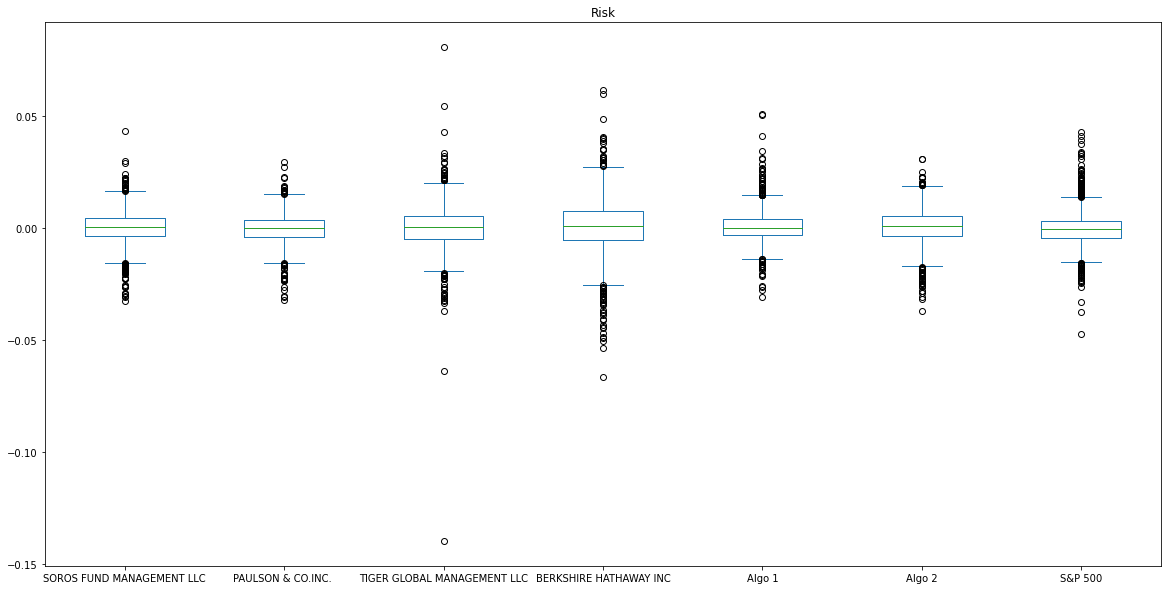

In [40]:
# Box plot to visually show risk
combined_returns.plot(kind="box", figsize=(20,10), title="Risk")

In [ ]:
### Calculate Standard Deviations

In [41]:
# Calculate the daily standard deviations of all portfolios
# Daily standard deviation of the S&P 500, which portfolio is riskier than this ?

daily_std = combined_returns.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [42]:
### Determine which portfolios are riskier than the S&P 500

In [43]:
# Determine which portfolios are riskier than the S&P 500
daily_std.loc["S&P 500"] > daily_std

BERKSHIRE HATHAWAY INC         False
TIGER GLOBAL MANAGEMENT LLC    False
S&P 500                        False
Algo 2                          True
SOROS FUND MANAGEMENT LLC       True
Algo 1                          True
PAULSON & CO.INC.               True
dtype: bool

In [44]:
### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized = daily_std.sort_values(ascending=False)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

<AxesSubplot:title={'center':'21-day Rolling Standard Deviation'}, xlabel='Date'>

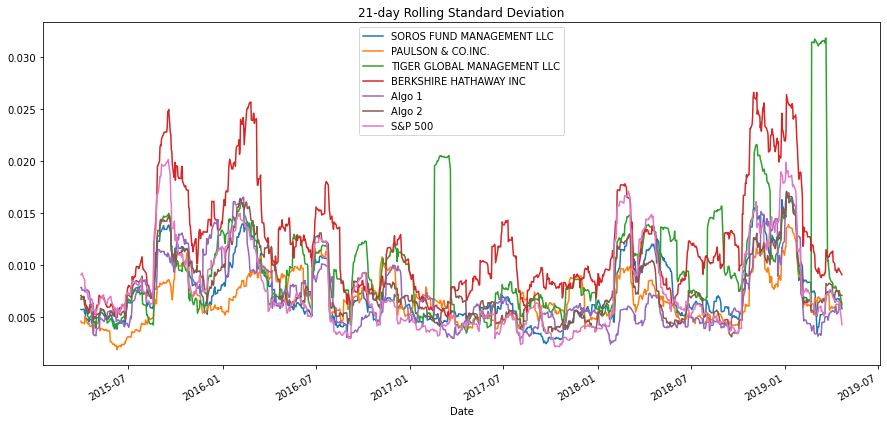

In [48]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window & # Plot the rolling standard deviation

combined_returns.rolling(window=21).std().plot(figsize=(15,7), title="21-day Rolling Standard Deviation")

In [49]:
### Calculate and plot the correlation

In [50]:
# Calculate the correlation & # Display de correlation matrix
correlation = combined_returns.corr()
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
S&P 500                                       0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2                                          0.507160   
S&P 500                                        -0.001505   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754157  0.320901  0.826730   
PAULSON & CO.INC.                          0.545451  0.268631  0.678085   
TIGER GLOBAL MANAGEMENT LLC                0.424125  0.164114  0.507160   
BERKSHIRE HATHAWAY INC                     1.000000  0.291678  0.687756   
Algo 1                                     0.291678  1.000000  0.287852   
Algo 2                                     0.687756  0.287852  1.000000   
S&P 500                                   -0.013856 -0.033963 -0.002192   

                              S&P 500  
SOROS FUND MANAGEMENT LLC    0.000574  
PAULSON & CO.INC.            0.013549  
TIGER GLOBAL MANAGEMENT LLC -0.001505  
BERKSHIRE HATHAWAY INC      -0.013856  
Algo 1                      -0.033963  
Algo 2                      -0.002192  
S&P 500                      1.000000

In [51]:
### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [52]:
# Calculate covariance of a single portfolio
covariance = combined_returns["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_returns['S&P 500'])
covariance

-1.4081131271818356e-07

In [53]:
# Calculate variance of S&P 500
variance = combined_returns['S&P 500'].var()
variance

7.373467552840441e-05

In [54]:
# Computing beta & # Plot beta trend
tiger_beta = covariance / variance
tiger_beta

-0.0019097027512373005

<AxesSubplot:title={'center':'Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

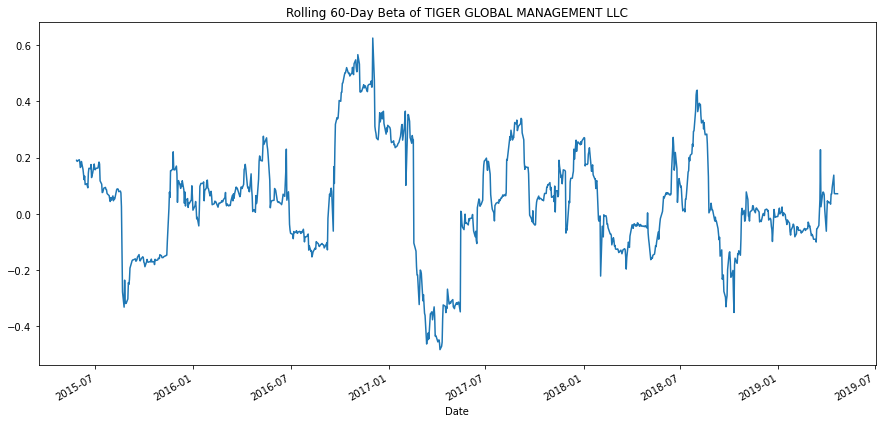

In [55]:
rolling_covariance = combined_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(combined_returns["S&P 500"])
rolling_variance = combined_returns["S&P 500"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(15, 7), title="Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT LLC")

<AxesSubplot:title={'center':'21-day Rolling Standard Deviation'}, xlabel='Date'>

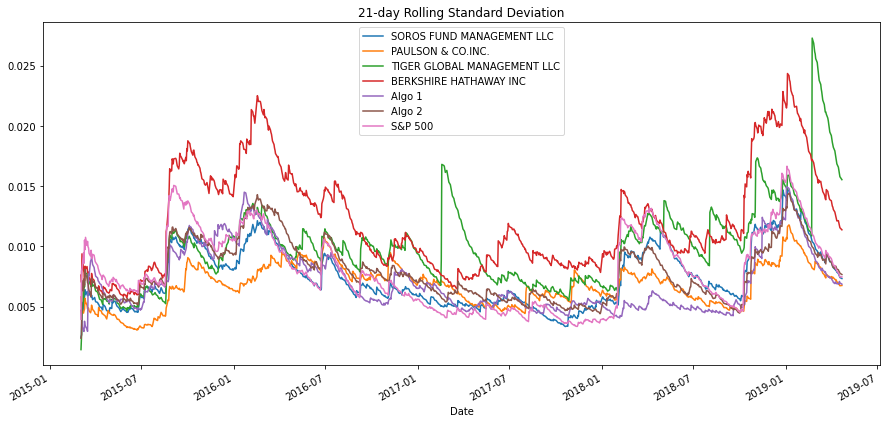

In [95]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).std().plot(figsize=(15,7), title="21-day Rolling Standard Deviation")

In [59]:
# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

Object `right` not found.


In [60]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

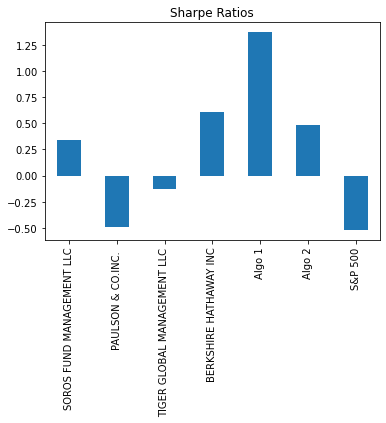

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [65]:
## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [66]:
# Reading data from 1st stock
aapl_historical_csv = Path("Resources/aapl_historical.csv")
aapl_historical = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_historical.head()

Symbol    NOCP
Trade DATE               
2019-05-09   AAPL  200.72
2019-05-08   AAPL  202.90
2019-05-07   AAPL  202.86
2019-05-06   AAPL  208.48
2019-05-03   AAPL  211.75

In [67]:
# Reading data from 2nd stock
cost_historical_csv = Path("Resources/cost_historical.csv")
cost_historical = pd.read_csv(cost_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_historical.head()

Symbol    NOCP
Trade DATE               
2019-05-09   COST  243.47
2019-05-08   COST  241.34
2019-05-07   COST  240.18
2019-05-06   COST  244.23
2019-05-03   COST  244.62

In [68]:
# Reading data from 3rd stock
goog_historical_csv = Path("Resources/goog_historical.csv")
goog_historical = pd.read_csv(goog_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_historical.head()

Symbol     NOCP
Trade DATE                
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40

In [69]:
# Combine all stocks in a single DataFrame
combined_custom_df = pd.concat([aapl_historical, cost_historical, goog_historical], axis="rows", join="outer")
combined_custom_df.head()

Symbol    NOCP
Trade DATE               
2019-05-09   AAPL  200.72
2019-05-08   AAPL  202.90
2019-05-07   AAPL  202.86
2019-05-06   AAPL  208.48
2019-05-03   AAPL  211.75

In [70]:
# Reset Date index
combined_custom_df.reset_index()

Trade DATE Symbol     NOCP
0   2019-05-09   AAPL   200.72
1   2019-05-08   AAPL   202.90
2   2019-05-07   AAPL   202.86
3   2019-05-06   AAPL   208.48
4   2019-05-03   AAPL   211.75
..         ...    ...      ...
745 2018-05-17   GOOG  1078.59
746 2018-05-16   GOOG  1081.77
747 2018-05-15   GOOG  1079.23
748 2018-05-14   GOOG  1100.20
749 2018-05-11   GOOG  1098.26

[750 rows x 3 columns]

In [71]:
# Reorganize portfolio data by having a column per symbol, keeping date as is
combined_custom_df = combined_custom_df.pivot(columns="Symbol", values ="NOCP")
combined_custom_df.head()

Symbol        AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59

In [72]:
# Calculate daily returns
daily_returns = combined_custom_df.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

Symbol          AAPL      COST      GOOG
Trade DATE                              
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
2018-05-18 -0.003637 -0.003206 -0.011339

In [73]:
## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [74]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [75]:
## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [76]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([combined_returns, portfolio_returns], axis= "columns", join = "inner")

In [77]:
a = all_portfolio_returns.columns[-1]
all_portfolio_returns = all_portfolio_returns.rename(columns={a:"Custom"})
all_portfolio_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P 500', 'Custom'],
      dtype='object')

In [78]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.isnull()
all_portfolio_returns.dropna(inplace=True)
all_portfolio_returns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   
2018-05-18                  -0.004357           -0.002672   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   
2018-05-18                    -0.012832               -0.002212  0.002557   
...                                 ...                     ...       ...   
2019-04-15                     0.000398               -0.010492 -0.004331   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   

              Algo 2   S&P 500    Custom  
2018-05-14  0.001635  0.006889  0.000015  
2018-05-15 -0.001139 -0.004044 -0.010064  
2018-05-16  0.003341  0.000857  0.009403  
2018-05-17  0.005205  0.002639 -0.001595  
2018-05-18 -0.002496 -0.007333 -0.006061  
...              ...       ...       ...  
2019-04-15 -0.004572 -0.000509  0.007522  
2019-04-16  0.002899  0.002279  0.000340  
2019-04-17 -0.005228 -0.001577  0.009292  
2019-04-18 -0.001229 -0.001011  0.001545  
2019-04-22 -0.001936 -0.008764  0.001217  

[236 rows x 8 columns]

In [79]:
## Re-run the risk analysis with your portfolio to see how it compares to the others

In [80]:
### Calculate the Annualized Standard Deviation

In [97]:
# Calculate the annualized `std`
all_portfolio_risk = all_portfolio_returns.std() * np.sqrt (252)
all_portfolio_risk  = all_portfolio_risk.sort_values(ascending=False)
all_portfolio_risk

BERKSHIRE HATHAWAY INC         0.247305
TIGER GLOBAL MANAGEMENT LLC    0.232898
Custom                         0.211627
S&P 500                        0.152469
SOROS FUND MANAGEMENT LLC      0.146812
Algo 2                         0.139499
Algo 1                         0.133927
PAULSON & CO.INC.              0.116928
dtype: float64

In [82]:
### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

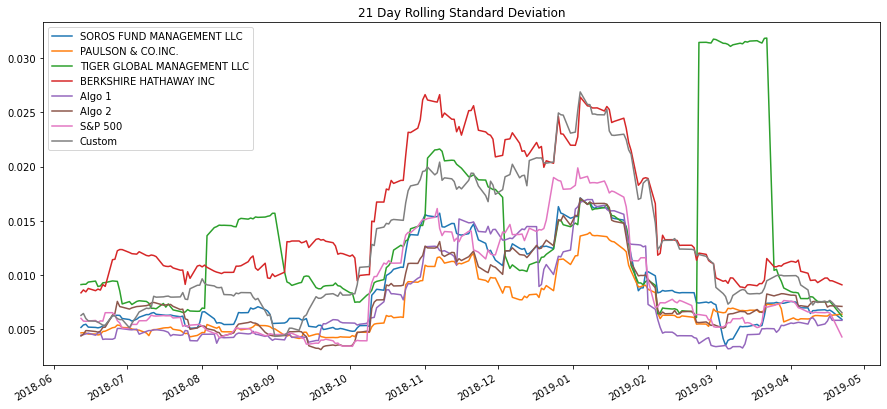

In [83]:
# Calculate rolling standard deviation & 
all_portfolio_returns_std = all_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
all_portfolio_returns_std.plot(figsize=(15,7), title="21 Day Rolling Standard Deviation")


In [84]:
### Calculate and plot the correlation

In [85]:
# Calculate and plot the correlation
all_covariance = all_portfolio_returns["Custom"].cov(all_portfolio_returns["S&P 500"])
all_covariance

7.174773010758071e-07

In [86]:
all_variance = all_portfolio_returns["S&P 500"].var()
all_variance

9.224865900102118e-05

In [87]:
custom_beta = all_covariance / all_variance
custom_beta

0.007777644779290121

In [88]:
### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Beta'}>

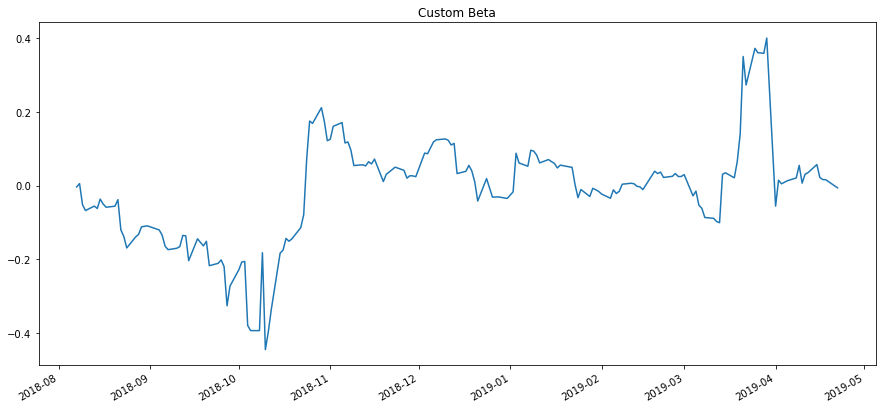

In [89]:
# Calculate and plot Beta
rolling_all_covariance = all_portfolio_returns["Custom"].rolling(window=60).cov(all_portfolio_returns["S&P 500"])
rolling_all_variance = all_portfolio_returns["S&P 500"].rolling(window=60).var()
rolling_all_beta = rolling_all_covariance / rolling_all_variance
rolling_all_beta.plot(figsize=(15, 7), title="Custom Beta")

In [90]:
### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [91]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
Custom                         0.876152
dtype: float64

<AxesSubplot:>

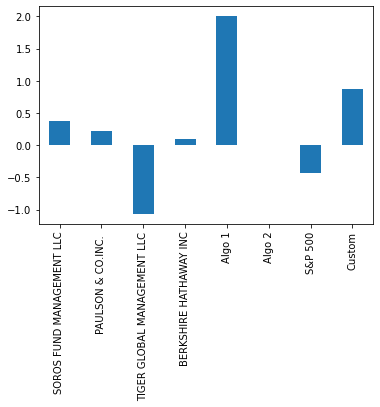

In [92]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar")

In [93]:
all_portfolio_returns.corr()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.791802   
PAULSON & CO.INC.                             0.791802            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.477844            0.484869   
BERKSHIRE HATHAWAY INC                        0.816197            0.650390   
Algo 1                                        0.336909            0.360727   
Algo 2                                        0.862583            0.783865   
S&P 500                                      -0.028256           -0.059862   
Custom                                        0.732548            0.643828   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.477844   
PAULSON & CO.INC.                               0.484869   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.324306   
Algo 1                                          0.113671   
Algo 2                                          0.408402   
S&P 500                                         0.005881   
Custom                                          0.390961   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.816197  0.336909  0.862583   
PAULSON & CO.INC.                          0.650390  0.360727  0.783865   
TIGER GLOBAL MANAGEMENT LLC                0.324306  0.113671  0.408402   
BERKSHIRE HATHAWAY INC                     1.000000  0.325985  0.782054   
Algo 1                                     0.325985  1.000000  0.364457   
Algo 2                                     0.782054  0.364457  1.000000   
S&P 500                                   -0.038832 -0.054478 -0.042540   
Custom                                     0.800558  0.260331  0.739020   

                              S&P 500    Custom  
SOROS FUND MANAGEMENT LLC   -0.028256  0.732548  
PAULSON & CO.INC.           -0.059862  0.643828  
TIGER GLOBAL MANAGEMENT LLC  0.005881  0.390961  
BERKSHIRE HATHAWAY INC      -0.038832  0.800558  
Algo 1                      -0.054478  0.260331  
Algo 2                      -0.042540  0.739020  
S&P 500                      1.000000  0.005603  
Custom                       0.005603  1.000000

In [ ]:
### How does your portfolio do?
Write your answer here!

The custom portfolio had a good result although not very great in comparison to the Algo 1. However, this was better in comparison to the other portfolios.
In terms of risk, the S&P 500 was lower compared to the custom portfolio